# Happy Customers survey 


## Buisiness problem

During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

## Goal(s)
Predict if a customer is happy or not based on the answers they give to questions asked

Identified important feature that make customer happy

## Success Metrics

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

## Data collection
We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#!pip install lazypredict

In [1]:
#!pip install pycaret

In [3]:
from pycaret.classification import *
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#deep learning
import torch
import torch.nn as nn
import torchvision.transforms as transforms

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, plot_confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_fscore_support, accuracy_score
#for tuning the model
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
os.listdir("gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO")

['Experiments_Happinesurvey_v2.ipynb',
 'ACME-HappinessSurvey2020.csv',
 'happinesurvey2020.csv',
 'Happinesurvey.ipynb',
 'experiemnts_of Happinesurvey.ipynb']

# Get the Data 

In [8]:
data = "gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO/happinesurvey2020.csv"

In [9]:
# read data 
df = pd.read_csv(data)
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [10]:
df.shape

(126, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [12]:
df.isna().sum()  # check for missing data

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [13]:
# Renaming the columns for readibility
df.columns = ['Target','Delivered_on_Time', 'Contents_as_expected', 
              'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']

In [14]:
#df.describe().T

In [15]:
df.nunique()

Target                    2
Delivered_on_Time         4
Contents_as_expected      5
Found_everything          5
Good_Price                5
Satisfied_with_courier    5
App_ease                  5
dtype: int64

In [16]:
for col in df.columns:
  print(col, ":", df[col].unique())


Target : [0 1]
Delivered_on_Time : [3 5 4 1]
Contents_as_expected : [3 2 4 5 1]
Found_everything : [3 2 4 5 1]
Good_Price : [4 5 3 2 1]
Satisfied_with_courier : [2 4 3 5 1]
App_ease : [4 3 5 2 1]


# Exploratory Data Analysis

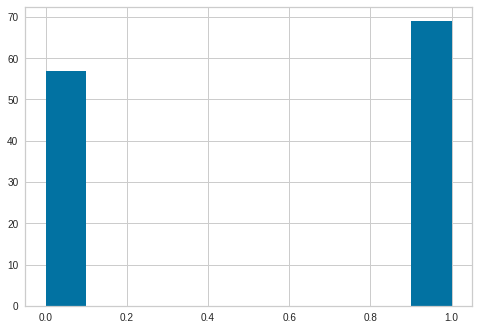

In [28]:
df.Target.hist()

In [31]:
df["Target"].value_counts()

1    69
0    57
Name: Target, dtype: int64

In [29]:
Unhappy = (df['Target']==0).sum()/126 
Happy = (df['Target']==1).sum()/126
dif = Happy - Unhappy 
print(Unhappy*100, Happy*100, dif*100) 

45.23809523809524 54.761904761904766 9.523809523809529


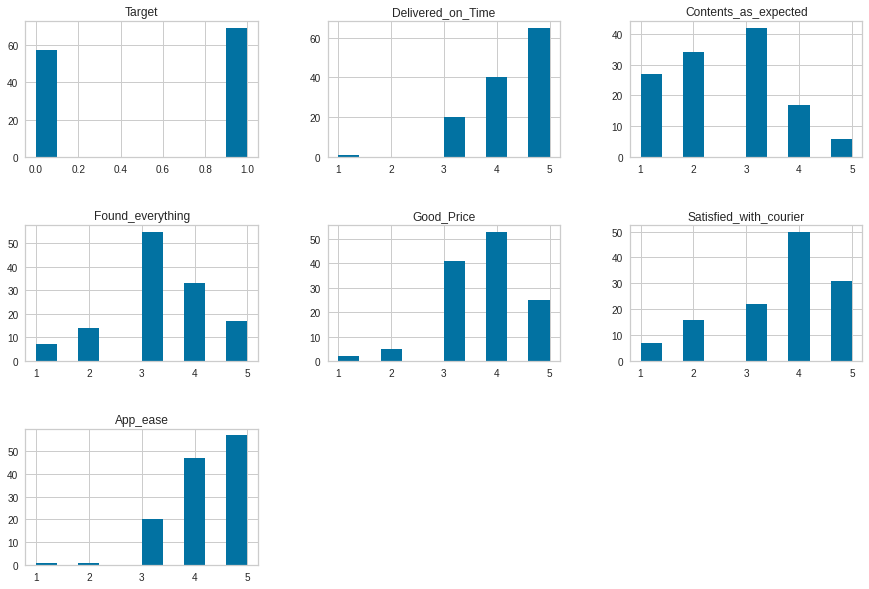

In [32]:
#view the distribution of data 
df.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

As expected, the variables could be considered as discrete or ordinal data, ranging from 1 to 5.

In general, the highest frequency was between 3 and 5, with the exception of the variable "the content of the order was expected" which had a high frequency value between 1 and 3.

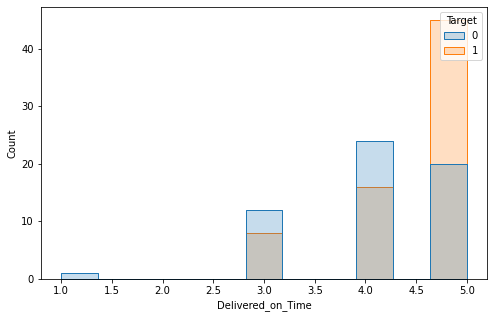

In [ ]:
plt.subplots(figsize=(8,5))
sns.histplot(df, x="Delivered_on_Time", hue="Target", element="step")

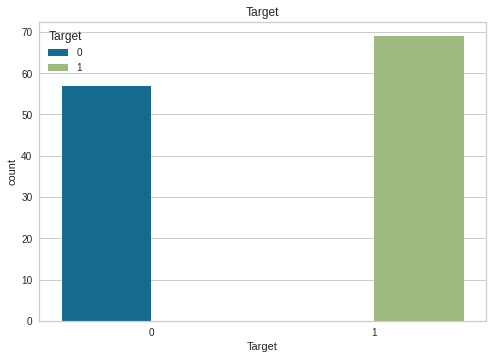

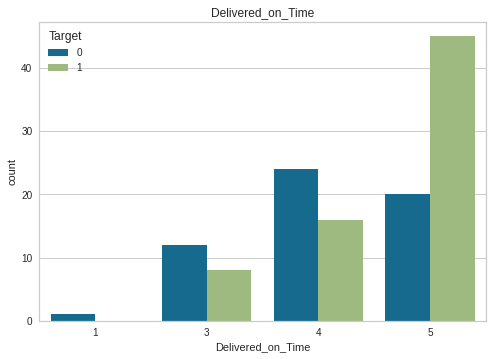

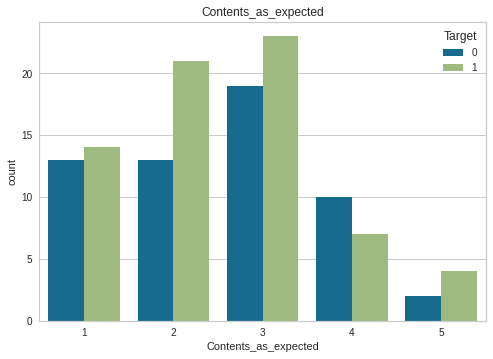

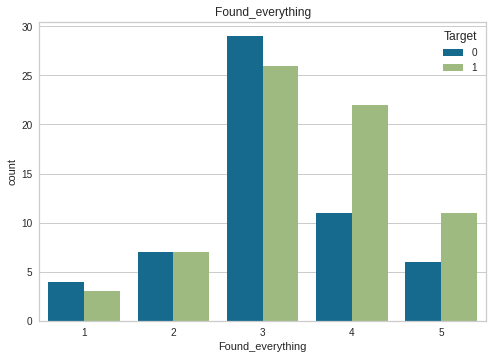

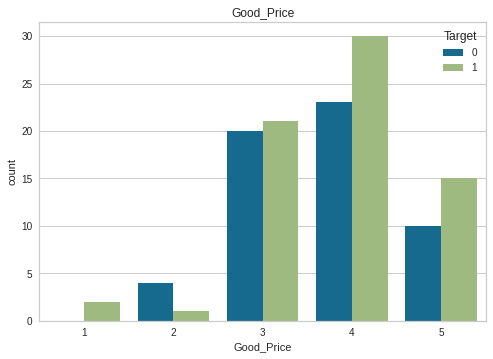

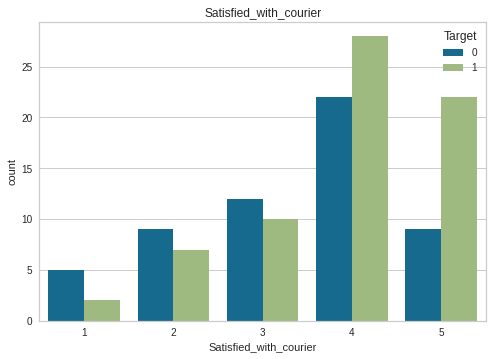

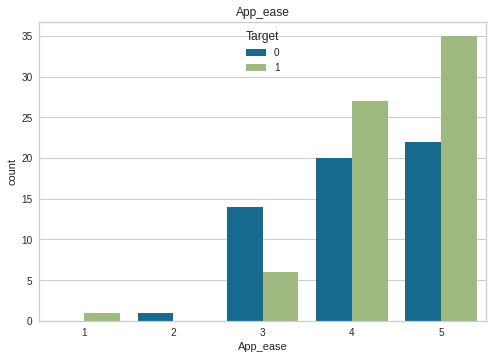

In [33]:
# count frequency in each group
for col in df.columns:
  sns.countplot(x=col,data=df, hue=df['Target'])
  plt.title(col)
  plt.show()

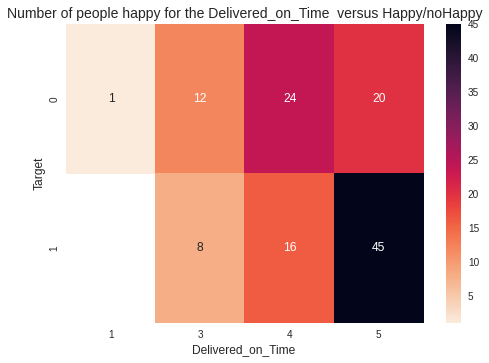

In [ ]:
Delivered_on_Time = df.groupby(['Delivered_on_Time','Target']).size()
Delivered_on_Time = Delivered_on_Time.reset_index(name = 'count')
Delivered_on_Time = Delivered_on_Time .pivot(index = 'Target', columns = 'Delivered_on_Time', values = 'count')
sns.heatmap(Delivered_on_Time , annot = True,  cmap = 'rocket_r');
plt.xlabel("Delivered_on_Time ", size = 12);
plt.ylabel("Target", size = 12);
plt.title ("Number of people happy for the Delivered_on_Time  versus Happy/noHappy", size = 14);

In [ ]:
def plot_count_in_each_var(df,col,Target):
  data = df.groupby([col,Target]).size()
  data = data.reset_index(name = 'count')
  data = data.pivot(index = Target, columns = col, values = 'count')
  sns.heatmap(data , annot = True,  cmap = 'rocket_r');
  plt.xlabel(col, size = 12);
  plt.ylabel(Target, size = 12);
  plt.title (col, size = 14)
  plt.show()



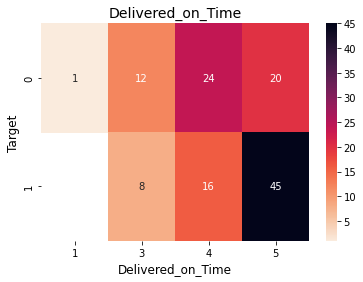

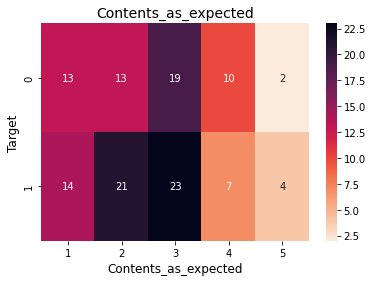

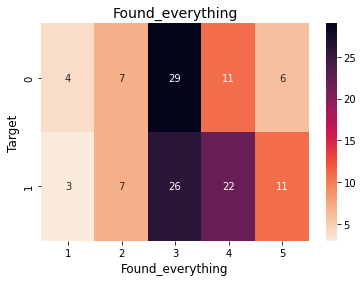

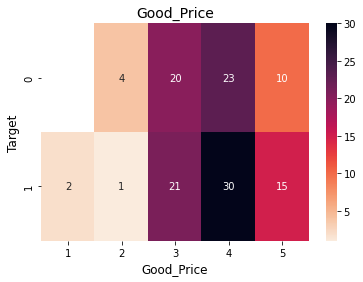

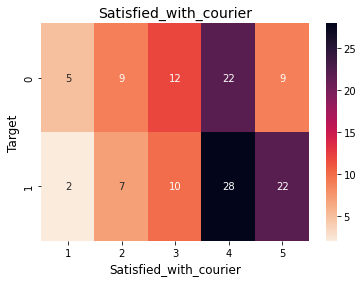

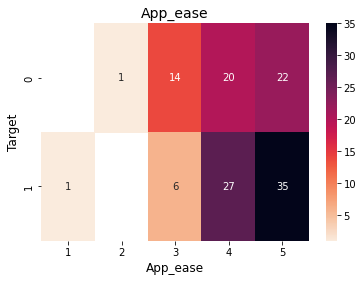

In [ ]:
for col in df.columns[1:7]: # exclude the first
  plot_count_in_each_var(df, col,'Target')

Here we wanted to see the distribution of responses across features and differentiate the type of customer (unhappy and happy customers).
We found that 

1. on-time delivery: happy customers tend to give a high score of 5 compared to unhappy customers.

2. content as expected: we found that both happy and unhappy customers give a high score between 2 and 3

3. everything was found: both customers give a score of 3.

4. good price: both customers give a high score of 4.

5.  Satisfied with the courier service. high score: 4 for both customers.

6. App_ease. Happy customers score 5 and unhappy customers score between 4 and 5. 


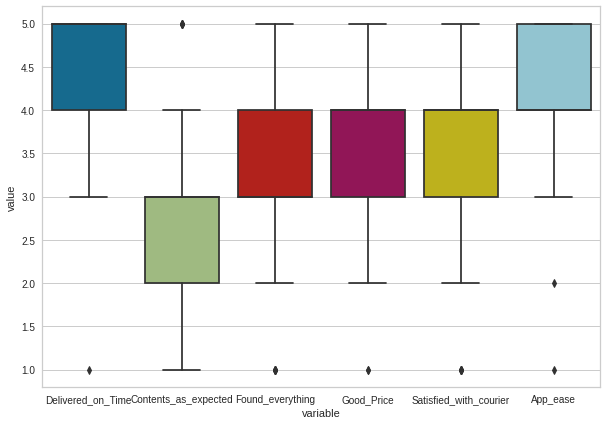

In [36]:
# visualize outliers

plt.figure(figsize=(10, 7))
data_melted = pd.melt(df[['Delivered_on_Time', 'Contents_as_expected', 
              'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']])
sns.boxplot(x='variable', y='value', data=data_melted)

According to this boxplot, there are no aberrations. All features are between 1 and 5. There are no extreme values. 

however the boxplot reveals that delevered_on_time and App_ease received the highest score of all clients.

We found that we needed to pay attention to Content_as_expected features due to their low score. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

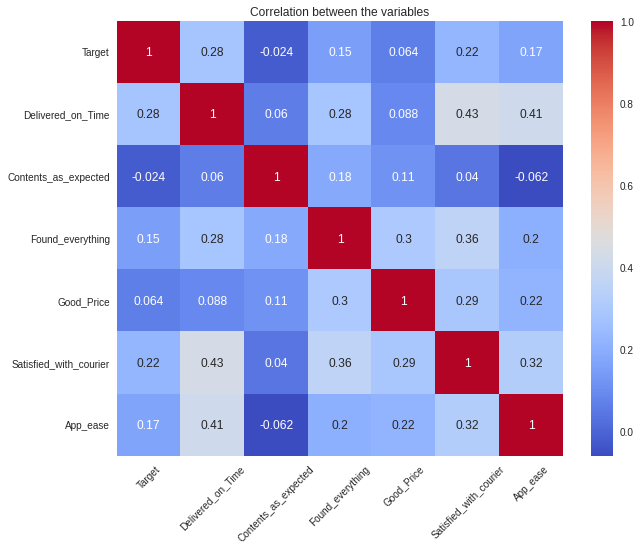

In [34]:
# correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

From the headmap, there is no strong correlation between features and target.
However, we found that there is a weak correlation between satisfied_with_courier and delivered_ont_time, App_ease and delivered_ont_time of 0.43 and 0.41


# statistical analysis
## χ2 test of Independence
The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset. That is, it defines the correlation amongst the grouping categorical data.

Using the Chi-square test, we can estimate the level of correlation i.e. association between the categorical variables of the dataset. This helps us analyze the dependence of one category of the variable on the other independent category of the variable.


It is used to decide whether there is a relationship exists between two variables of a population.

H₀: The two categorical variables have no relationship

H₁: There is a relationship between two categorical variables




we apply the Chi_square or Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables.

The Contingency Table : A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables

#### Define the null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis) — the target features are independent to ohter variables 

H₁ (Alternate Hypothesis) — the target features are dependent to ohter variables 



In [46]:
df.columns

Index(['Target', 'Delivered_on_Time', 'Contents_as_expected',
       'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease'],
      dtype='object')

In [47]:
df_crosstab = pd.crosstab(df['Target'],
                            df['Delivered_on_Time'],
                           margins=True, margins_name="Total")
df_crosstab

Delivered_on_Time,1,3,4,5,Total
Target,,,,,
0,1,12,24,20,57
1,0,8,16,45,69
Total,1,20,40,65,126


In [48]:
import scipy.stats as stats
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['Target'].unique()
columns = df['Delivered_on_Time'].unique()
for i in columns:
    for j in rows:
        O = df_crosstab[i][j]
        E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and p value is: 0.007447837905122601
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


In [49]:
import pandas as pd
import scipy.stats as stats

def chi_square(df, alpha, col1, col2):
  # significance level
  alpha = alpha
  # crosstab
  df_crosstab = pd.crosstab(df[col1],
                            df[col2],
                           margins=True, margins_name="Total")
  # Calcualtion of Chisquare
  chi_square = 0
  rows = df[col1].unique()
  columns = df[col2].unique()
  for i in columns:
      for j in rows:
          O = df_crosstab[i][j]
          E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
          chi_square += (O-E)**2/E

  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
  conclusion = "Failed to reject the null hypothesis."
  if p_value <= alpha:
      conclusion = "Null Hypothesis is rejected."
          
  print("chisquare-score is:", chi_square, " and p value is:", p_value)
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  #Find the critical value for 95% confidence
  critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
  conclusion = "Failed to reject the null hypothesis."
  if chi_square > critical_value:
      conclusion = "Null Hypothesis is rejected."
          
  return print("chisquare-score is:", chi_square, " and critical value is:", critical_value, conclusion)

In [50]:
df.columns

Index(['Target', 'Delivered_on_Time', 'Contents_as_expected',
       'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease'],
      dtype='object')

In [51]:
chi_square(df, 0.05, 'Target', 'Delivered_on_Time')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and p value is: 0.007447837905122601
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and critical value is: 7.814727903251179 Null Hypothesis is rejected.


In [52]:
chi_square(df, 0.05, 'Target', 'Contents_as_expected')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2.3751065643648768  and p value is: 0.6671305095864376
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2.3751065643648768  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [53]:
chi_square(df, 0.05, 'Target', 'Found_everything')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4.340258691369205  and p value is: 0.3619109993358314
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4.340258691369205  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [54]:
chi_square(df, 0.05, 'Target', 'Good_Price')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4.648222148039018  and p value is: 0.32533209688115616
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4.648222148039018  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [55]:
chi_square(df, 0.05, 'Target', 'Satisfied_with_courier')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 6.8080391498956505  and p value is: 0.14638693674994785
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 6.8080391498956505  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [56]:
chi_square(df, 0.05, 'Target', 'App_ease')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 8.138426254545267  and p value is: 0.08663706753285116
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 8.138426254545267  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


#### Conclusion of the chi_squared test 

delivered_on_time: Ho rejected

Contents_as_expected: Ho accepted

Found_everything': Ho accepted

Good_Price: Ho accepted 

Satisfied_with_courier: Ho accepted 

App_ease : Ho accepted 

The null hypothesis was accepted in all features except one (delivered_on_time) where the null hypothesis was rejected. 

Customer dissatisfaction/satisfaction is independent of all variables except the delivery_on_time variable. 


#### 2nd Method

In [ ]:
from scipy.stats import chi2_contingency 

In [61]:
categorical_col = df.columns[1:]
print(categorical_col)

Index(['Delivered_on_Time', 'Contents_as_expected', 'Found_everything',
       'Good_Price', 'Satisfied_with_courier', 'App_ease'],
      dtype='object')


In [62]:
chisqt = pd.crosstab(df.Target, df.Good_Price, margins=True)
print(chisqt)

Good_Price  1  2   3   4   5  All
Target                           
0           0  4  20  23  10   57
1           2  1  21  30  15   69
All         2  5  41  53  25  126


In [63]:
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(4.648222148039019, 0.325332096881156, 4)


In [69]:
stat, p, dof = (chi2_contingency(value)[0:3])
 
print(stat, p, dof)

4.648222148039019 0.325332096881156 4


In [70]:
significance_level = 0.05
print("p value: " + str(p)) 

if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 0.325332096881156
ACCEPT NULL HYPOTHESIS


# Features Ingineering 

get the mean of all score

get the sum of all score 

get the frequency

In [17]:
df.nunique() , df.columns

(Target                    2
 Delivered_on_Time         4
 Contents_as_expected      5
 Found_everything          5
 Good_Price                5
 Satisfied_with_courier    5
 App_ease                  5
 dtype: int64, Index(['Target', 'Delivered_on_Time', 'Contents_as_expected',
        'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease'],
       dtype='object'))

In [84]:
total_exp_points = 30 
numbers_indp_var = 6

In [18]:
df['percent_score'] = df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)/30*100
df['percent_score'].head(5)

0   63.33
1   66.67
2   73.33
3   76.67
4   76.67
Name: percent_score, dtype: float64

In [19]:
df['mean_score'] = df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)/6
df['mean_score'].head(5)

0   3.17
1   3.33
2   3.67
3   3.83
4   3.83
Name: mean_score, dtype: float64

In [20]:
df['total_score']= df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)
df['total_score'].head(5)

0    19
1    20
2    22
3    23
4    23
Name: total_score, dtype: int64

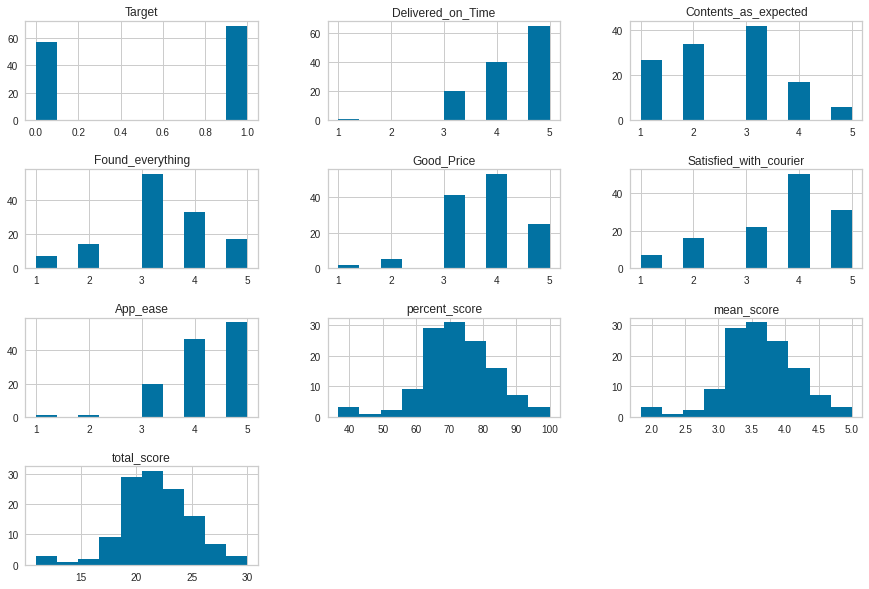

In [21]:
#view the distribution of data 
df.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

# Imbalanced Classification in Python: SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [23]:
df['Target'].value_counts()

1    69
0    57
Name: Target, dtype: int64

In [24]:
y= df.Target
X= df.drop(columns = ['Target'])

we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [26]:
# Oversample
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [27]:
counter = Counter(y_res)
print(counter)

Counter({0: 69, 1: 69})


# Data Preprocessing 
Get Dummies for ordinal variable 

In [69]:
df2 = df.copy(deep=True)
#df['DataFrame Column'] = df['DataFrame Column'].astype(str)
#df['DataFrame Column'] = df['DataFrame Column'].apply(str)
#df = df.applymap(str)
df2[df2.columns[1:7]] = df2[df2.columns[1:7]].applymap(str)
df2.dtypes

Target                      int64
Delivered_on_Time          object
Contents_as_expected       object
Found_everything           object
Good_Price                 object
Satisfied_with_courier     object
App_ease                   object
percent_score             float64
mean_score                float64
total_score                 int64
dtype: object

In [71]:
for col in df2.columns[1:7]:
  print(col, ":", df2[col].unique())

Delivered_on_Time : ['3' '5' '4' '1']
Contents_as_expected : ['3' '2' '4' '5' '1']
Found_everything : ['3' '2' '4' '5' '1']
Good_Price : ['4' '5' '3' '2' '1']
Satisfied_with_courier : ['2' '4' '3' '5' '1']
App_ease : ['4' '3' '5' '2' '1']


In [72]:
yy= df2.Target
XX= df2.drop(columns = ['Target'])

In [73]:
# Oversample
sm = SMOTE(random_state=42)
XX_res, yy_res = sm.fit_resample(XX, yy)

In [ ]:
XX_res.columns, XX_res,dtypes

In [74]:
counter = Counter(yy_res)
print(counter)

Counter({0: 69, 1: 69})


In [75]:
XX_res = pd.get_dummies(data=XX_res, columns=['Delivered_on_Time', 'Contents_as_expected', 'Found_everything',
       'Good_Price', 'Satisfied_with_courier', 'App_ease'])
XX_res.head()

,percent_score,mean_score,total_score,Delivered_on_Time_1.0,Delivered_on_Time_3.0,Delivered_on_Time_3.6982230541022942,Delivered_on_Time_3.7650369807445667,Delivered_on_Time_3.999221234158986,Delivered_on_Time_4.0,Delivered_on_Time_4.007066305219717,Delivered_on_Time_4.278001227733175,Delivered_on_Time_4.388346839511719,Delivered_on_Time_4.524774660258389,Delivered_on_Time_4.938552709015751,Delivered_on_Time_5.0,Contents_as_expected_1.0,Contents_as_expected_1.0015575316820287,Contents_as_expected_1.4752253397416109,Contents_as_expected_1.611653160488281,Contents_as_expected_2.0,Contents_as_expected_2.6174815096277166,Contents_as_expected_2.6508884729488527,Contents_as_expected_2.9769375749585842,Contents_as_expected_3.0,Contents_as_expected_3.9435884209728997,Contents_as_expected_3.985867389560565,Contents_as_expected_4.0,Contents_as_expected_4.600139028284745,Contents_as_expected_5.0,Found_everything_1.0,Found_everything_1.9504506794832217,Found_everything_2.0,Found_everything_2.223306320976562,Found_everything_2.9922115592912175,Found_everything_3.0,Found_everything_3.721998772266825,Found_everything_3.9435884209728997,Found_everything_4.0,Found_everything_4.061447290984249,Found_everything_4.2002780565694895,Found_everything_5.0,Good_Price_1.0,Good_Price_2.0,Good_Price_3.0,Good_Price_3.721998772266825,Good_Price_3.776693679023438,Good_Price_3.9929336947802825,Good_Price_4.0,Good_Price_4.049549320516778,Good_Price_4.600139028284745,Good_Price_5.0,Satisfied_with_courier_1.0,Satisfied_with_courier_1.0564115790271003,Satisfied_with_courier_2.0,Satisfied_with_courier_2.1995829151457666,Satisfied_with_courier_3.0,Satisfied_with_courier_3.475225339741611,Satisfied_with_courier_3.611653160488281,Satisfied_with_courier_3.9984424683179713,Satisfied_with_courier_4.0,Satisfied_with_courier_4.061447290984249,Satisfied_with_courier_4.976937574958584,Satisfied_with_courier_5.0,App_ease_1.0,App_ease_2.0,App_ease_2.0077884407087825,App_ease_3.0,App_ease_3.000778765841014,App_ease_3.014132610439435,App_ease_3.0461248500828315,App_ease_3.0564115790271003,App_ease_3.3998609717152553,App_ease_3.6174815096277166,App_ease_3.6508884729488527,App_ease_4.0,App_ease_4.278001227733175,App_ease_4.388346839511719,App_ease_4.524774660258389,App_ease_4.938552709015751,App_ease_5.0
0,63.33,3.17,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,66.67,3.33,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,73.33,3.67,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,76.67,3.83,23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,76.67,3.83,23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modelling

- get target and predictors
- split data into train and test set
- build the model 
- evaluate the model
- tune the model 
- select the best model 

In [96]:
y= df.Target
X= df.drop(columns = ['Target'])

In [ ]:
X, y # umbalance dataset 

X_res, y_res # Balance dataset 

XX_res, yy_res # bakance dataset with dummies features 

In [78]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(XX_res, yy_res, test_size=0.25, random_state=47)

## Lazypredict

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning #####https://lazypredict.readthedocs.io/en/latest/installation.html

In [79]:
lzy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state= 47)
lzy_models,predictions = lzy_clf.fit(X_train, X_test, y_train, y_test)

print(lzy_models)
print(type(lzy_models))

100%|██████████| 29/29 [00:01<00:00, 21.47it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.71               0.72     0.72      0.71   
BernoulliNB                        0.69               0.70     0.70      0.68   
NearestCentroid                    0.69               0.70     0.70      0.68   
XGBClassifier                      0.69               0.68     0.68      0.68   
DummyClassifier                    0.66               0.66     0.66      0.66   
RandomForestClassifier             0.66               0.65     0.65      0.66   
LinearDiscriminantAnalysis         0.63               0.64     0.64      0.63   
RidgeClassifier                    0.63               0.64     0.64      0.63   
LogisticRegression                 0.63               0.64     0.64      0.63   
LinearSVC                          0.63               0.64     0.64      0.63   
AdaBoostClassifier          

In [40]:
lzy_models['F1 Score_vs_time'] = lzy_models['F1 Score']/lzy_models['Time Taken']
lzy_models;

In [85]:
#lzy_models[['F1 Score','F1 Score_vs_time']].sort_values(by='F1 Score',ascending=False)

In [82]:
lzy_models['AUC Score_vs_time'] = lzy_models['ROC AUC']/lzy_models['Time Taken']
lzy_models;

In [83]:
lzy_models[['ROC AUC','AUC Score_vs_time']].sort_values(by='ROC AUC',ascending=False).head(5)

,ROC AUC,AUC Score_vs_time
Model,,
LGBMClassifier,0.72,26.48
BernoulliNB,0.70,44.47
NearestCentroid,0.70,33.09
XGBClassifier,0.68,11.89
DummyClassifier,0.66,42.01


### Decision Tree

In [86]:
#building decision tree
dt = DecisionTreeClassifier(class_weight={0:0.452,1:0.548}, random_state=47)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.65      0.68      0.67        19
       happy       0.60      0.56      0.58        16

    accuracy                           0.63        35
   macro avg       0.62      0.62      0.62        35
weighted avg       0.63      0.63      0.63        35



### Random forest

In [87]:
#rf_clf0= RandomForestClassifier(class_weight={0:0.452,1:0.548}, random_state=47)
rf_clf0= RandomForestClassifier(random_state=47)
rf_clf0.fit(X_train, y_train)
rf_clf0.score(X_test, y_test)

0.6571428571428571

In [88]:
y_pred = rf_clf0.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.68      0.68      0.68        19
       happy       0.62      0.62      0.62        16

    accuracy                           0.66        35
   macro avg       0.65      0.65      0.65        35
weighted avg       0.66      0.66      0.66        35



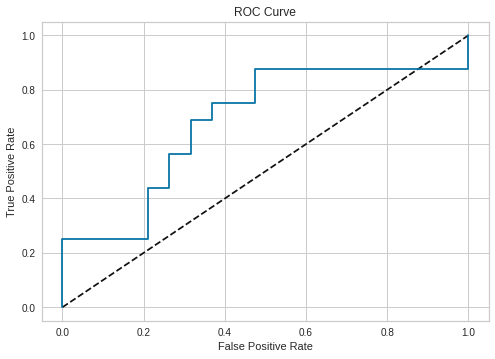

In [89]:
y_pred_prob = rf_clf0.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [90]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.680921052631579


In [91]:
# Compute cross-validated AUC scores: cv_auc
cv_rf = cross_val_score(rf_clf0, X_train, y_train, cv = 5, scoring = 'roc_auc')
print(cv_rf)
print(cv_rf.mean())

[0.66818182 0.64545455 0.61363636 0.66       0.73      ]
0.6634545454545455


### Random Forest two rf_clf1 with Hyperparameter tunning 

In [92]:
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8, 10]
min_samples_split = [2,3, 4, 5]
min_samples_leaf = [1,2, 3]
bootstrap = [True, False]

In [93]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [127]:
rf_clf1 = RandomForestClassifier(class_weight={0:0.452,1:0.548}, random_state= 47)
# n_jobs -1, all CPUs are used.
rf_RandomGrid = RandomizedSearchCV(estimator = rf_clf1, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1, random_state=47)

In [128]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight={0: 0.452,
                                                                  1: 0.548},
                                                    random_state=47),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 14, 19, 24, 28, 33,
                                                         38, 43, 47, 52, 57, 62,
                                                         66, 71, 76, 81, 85, 90,
                                                         95, 100]},
                   random_state=47, verbose=2)

In [129]:
rf_RandomGrid.best_params_

{'n_estimators': 81,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

{'n_estimators': 76,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

 Precision = 1, recall= 0.24, acc= 0.5

In [130]:
rf_clf1 = rf_RandomGrid.best_estimator_
y_pred = rf_clf1.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.67      0.53      0.59        19
       happy       0.55      0.69      0.61        16

    accuracy                           0.60        35
   macro avg       0.61      0.61      0.60        35
weighted avg       0.61      0.60      0.60        35



[[10  9]
 [ 5 11]]


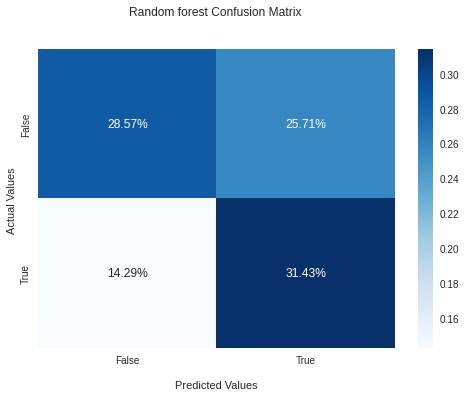

In [131]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
# plot the comfusion matrix
ax=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('Random forest Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

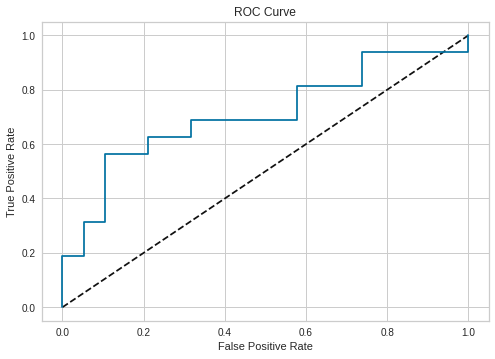

In [99]:
y_pred_prob = rf_clf1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [100]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7072368421052632


In [101]:
# Compute cross-validated AUC scores: cv_auc
cv_rf = cross_val_score(rf_clf1, X_train, y_train, cv = 5, scoring = 'roc_auc')
print(cv_rf)
print(cv_rf.mean())

[0.79545455 0.62727273 0.55454545 0.67       0.71      ]
0.6714545454545454


Text(0.5, 1.0, 'Random forest Feature importances ')

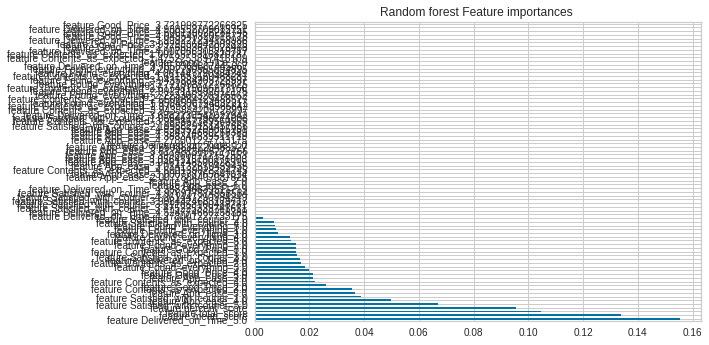

In [104]:

feat_importance = rf_clf1.feature_importances_
feature_names = [f"feature {i}" for i in X_train.columns]
forest_importances = pd.Series(feat_importance, index=feature_names).sort_values(ascending=False)
forest_importances.plot.barh()
plt.title("Random forest Feature importances ")

### XGBoost 

In [132]:
# XGBOOST Model - 1rst model 
XGB = XGBClassifier(n_estimators=1000,learning_rate=0.05)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) #predictions
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.43%


In [133]:
target_names = ['Happy', 'No_happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Happy       0.74      0.74      0.74        19
    No_happy       0.69      0.69      0.69        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



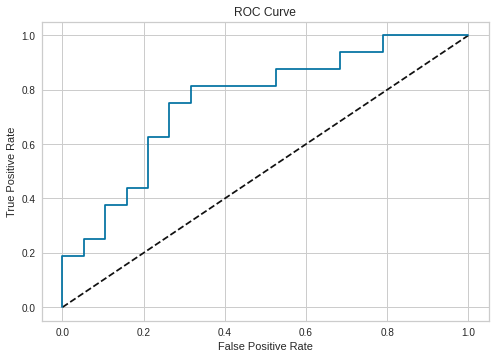

In [134]:
y_pred_prob = XGB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [108]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.756578947368421


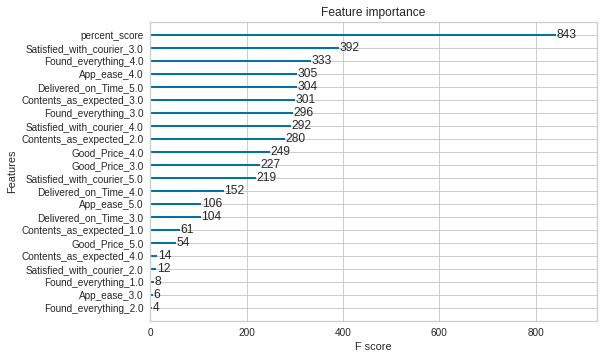

In [109]:
plot_importance(XGB.fit(X_train, y_train))

In [110]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[14  5]
 [ 5 11]]


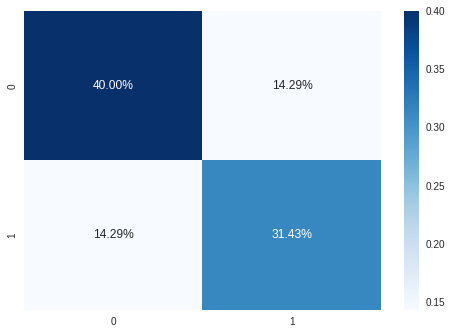

In [111]:
ax=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### XGBoost Two

In [112]:
xgb_param_dict = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20],
    'max_depth':range(1,10,2),
    'min_child_weight':range(1,10,2),
    'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree':[ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb_classifier = XGBClassifier()

xgb2 = GridSearchCV(xgb_classifier, 
                    param_grid=xgb_param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)

xgb2.fit(X_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 16164 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 19964 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:  8.6min finished


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': range(1, 10, 2),
                         'min_child_weight': range(1, 10, 2)},
             verbose=1)

In [113]:
xgb2.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5}

In [114]:
xgb2_estimator = xgb2.best_estimator_
y_pred_ = xgb2_estimator.predict(X_train)

In [115]:
target_names = ['Happy', 'No_happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Happy       0.74      0.74      0.74        19
    No_happy       0.69      0.69      0.69        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



### Bernoulli Naïve Bayes Classifier
#### Attributes
-	 class_log_prior_ − array, shape(n_classes,): It provides the smoothed log probability for every class.
- class_count_ − array, shape(n_classes,) : It provides the actual number of training samples encountered for each class.
- 	feature_log_prob_ − array, shape (n_classes, n_features): It gives the empirical log probability of features given a class  P(features⏐Y)
- feature_count_ − array, shape (n_classes, n_features): It provides the actual number of training samples encountered for each (class,feature

In [116]:
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(X_train, y_train)

BernoulliNB()

In [117]:
y_pred = BNBclf.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.77      0.53      0.62        19
       happy       0.59      0.81      0.68        16

    accuracy                           0.66        35
   macro avg       0.68      0.67      0.65        35
weighted avg       0.69      0.66      0.65        35



### PassiveAggressiveClassifier
How Passive-Aggressive Algorithms Work:
Passive-Aggressive algorithms are called so because :

Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 

Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.
- parameters
- C : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction
- max_iter : The maximum number of iterations the model makes over the training data.
- tol : The stopping criterion. If it is set to None, the model will stop when (loss > previous_loss  –  tol). By default, it is set to 1e-3.

In [118]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [119]:
pac = PassiveAggressiveClassifier(C=0.5, max_iter=1000, random_state=47, tol=1e-3)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(C=0.5, random_state=47)

In [120]:
y_pred = pac.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) #predictions
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.29%


In [121]:
y_pred = pac.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.54      1.00      0.70        19
       happy       0.00      0.00      0.00        16

    accuracy                           0.54        35
   macro avg       0.27      0.50      0.35        35
weighted avg       0.29      0.54      0.38        35



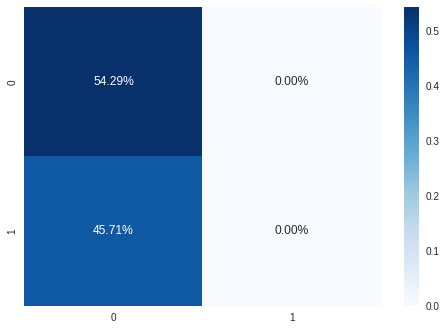

In [122]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Pycaret 
low-code machine learning library in Python that automates machine learning workflows.

In [ ]:
clf1 = setup(data = df, 
             target = 'Target',
             #numeric_imputation = 'mean',
             #categorical_features = ['Sex','Embarked'], 
             #ignore_features = ['Telephone','Instalment_per_cent','Value_Savings_Stocks'],
             silent = True)

,Description,Value
0,session_id,8907
1,Target,Target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(126, 10)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.60,0.59,0.68,0.63,0.64,0.19,0.22,0.58
lightgbm,Light Gradient Boosting Machine,0.60,0.66,0.60,0.63,0.60,0.19,0.20,0.09
knn,K Neighbors Classifier,0.58,0.55,0.66,0.58,0.61,0.14,0.16,0.12
et,Extra Trees Classifier,0.56,0.53,0.63,0.57,0.59,0.10,0.12,0.46
nb,Naive Bayes,0.55,0.62,0.24,0.65,0.33,0.14,0.19,0.02
dt,Decision Tree Classifier,0.54,0.53,0.55,0.56,0.54,0.08,0.09,0.02
gbc,Gradient Boosting Classifier,0.54,0.53,0.61,0.56,0.58,0.08,0.08,0.07
dummy,Dummy Classifier,0.53,0.50,1.00,0.53,0.69,0.00,0.00,0.01
qda,Quadratic Discriminant Analysis,0.53,0.53,0.59,0.58,0.56,0.05,0.06,0.04
svm,SVM - Linear Kernel,0.52,0.00,0.60,0.33,0.42,0.00,0.00,0.02


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8907, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8907, verbose=0,
                       warm_start=False)

In [ ]:
GradientBoostClass = create_model('rf')
GradientBoostClass

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.67,0.55,1.00,0.62,0.77,0.27,0.40
1,0.44,0.55,0.60,0.50,0.55,-0.15,-0.16
2,0.56,0.45,0.60,0.60,0.60,0.10,0.10
3,0.78,0.75,1.00,0.71,0.83,0.53,0.60
4,0.56,0.60,0.60,0.60,0.60,0.10,0.10
5,0.67,0.85,0.80,0.67,0.73,0.31,0.32
6,0.44,0.55,0.40,0.50,0.44,-0.10,-0.10
7,0.67,0.68,0.75,0.60,0.67,0.34,0.35
8,0.75,0.56,0.50,1.00,0.67,0.50,0.58


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8907, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8907, verbose=0,
                       warm_start=False)

In [ ]:
#tuned_GradientBoostClass = tune_model(GradientBoostClass)

In [ ]:
#tuned_RandomForestClassifier = tune_model(RandomForestClassifier)

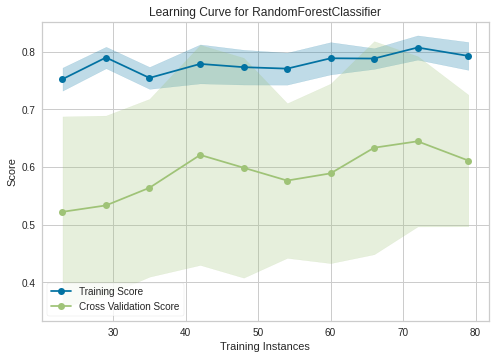

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_GradientBoostClass, plot = 'learning')

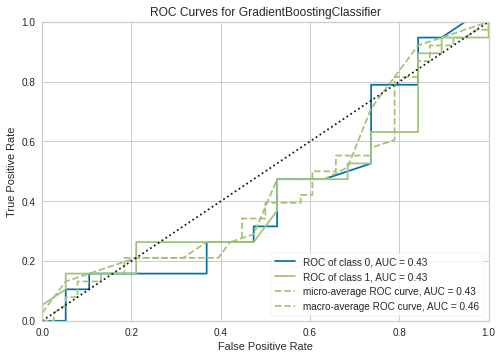

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_GradientBoostClass, plot = 'auc')

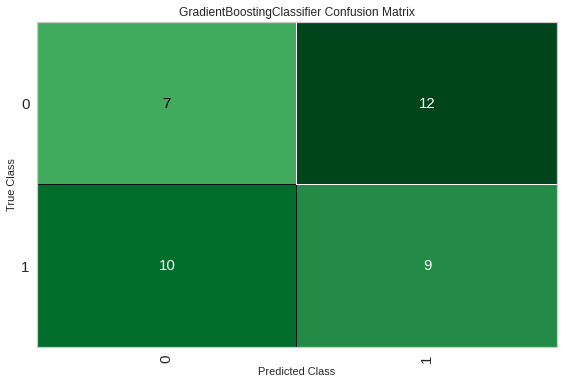

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_GradientBoostClass, plot = 'confusion_matrix')

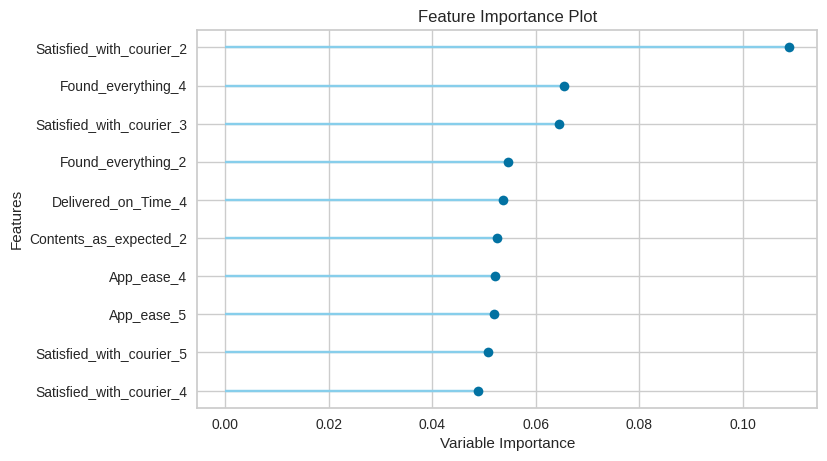

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator= tuned_GradientBoostClass, plot='feature')

In [ ]:
#evaluate_model(tuned_GradientBoostClass)

In [ ]:
#interpret_model(tuned_GradientBoostClass) # import shapvalue 

In [ ]:
#predictions = predict_model(tuned_GradientBoostClass, data=df)
#predictions.head()

### deep learning model NN

In [ ]:
X = X.to_numpy()
X[:3]

array([[ 3.        ,  3.        ,  3.        ,  4.        ,  2.        ,
         4.        , 63.33333333,  3.16666667, 19.        ],
       [ 3.        ,  2.        ,  3.        ,  5.        ,  4.        ,
         3.        , 66.66666667,  3.33333333, 20.        ],
       [ 5.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         5.        , 73.33333333,  3.66666667, 22.        ]])

In [ ]:
y=y.to_numpy()
y[:3]

array([0, 0, 1])

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
# View the first five samples
X[:5], y[:5]

(tensor([[ 3.0000,  3.0000,  3.0000,  4.0000,  2.0000,  4.0000, 63.3333,  3.1667,
          19.0000],
         [ 3.0000,  2.0000,  3.0000,  5.0000,  4.0000,  3.0000, 66.6667,  3.3333,
          20.0000],
         [ 5.0000,  3.0000,  3.0000,  3.0000,  3.0000,  5.0000, 73.3333,  3.6667,
          22.0000],
         [ 5.0000,  4.0000,  3.0000,  3.0000,  3.0000,  5.0000, 76.6667,  3.8333,
          23.0000],
         [ 5.0000,  4.0000,  3.0000,  3.0000,  3.0000,  5.0000, 76.6667,  3.8333,
          23.0000]]), tensor([0., 0., 1., 0., 0.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)



(100, 26, 100, 26)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [ ]:
from torch import nn
class ClassModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=9, out_features=32)
        self.layer_2 = nn.Linear(in_features=32, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = ClassModelV1().to(device)
print(model_0)

ClassModelV1(
  (layer_1): Linear(in_features=9, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1500
# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.03259, Accuracy: 58.00% | Test Loss: 6.20780, Test Accuracy: 57.69%
Epoch: 100 | Loss: 0.67505, Accuracy: 58.00% | Test Loss: 0.72119, Test Accuracy: 42.31%
Epoch: 200 | Loss: 0.67242, Accuracy: 58.00% | Test Loss: 0.71294, Test Accuracy: 42.31%
Epoch: 300 | Loss: 0.67384, Accuracy: 58.00% | Test Loss: 0.69452, Test Accuracy: 42.31%
Epoch: 400 | Loss: 0.67288, Accuracy: 58.00% | Test Loss: 0.69208, Test Accuracy: 46.15%
Epoch: 500 | Loss: 0.67213, Accuracy: 59.00% | Test Loss: 0.69089, Test Accuracy: 42.31%
Epoch: 600 | Loss: 0.67144, Accuracy: 59.00% | Test Loss: 0.69048, Test Accuracy: 42.31%
Epoch: 700 | Loss: 0.66995, Accuracy: 59.00% | Test Loss: 0.69046, Test Accuracy: 42.31%
Epoch: 800 | Loss: 0.66848, Accuracy: 59.00% | Test Loss: 0.69086, Test Accuracy: 42.31%
Epoch: 900 | Loss: 0.67153, Accuracy: 59.00% | Test Loss: 0.68803, Test Accuracy: 46.15%
Epoch: 1000 | Loss: 0.68150, Accuracy: 58.00% | Test Loss: 0.71706, Test Accuracy: 42.31%
Epoch: 1100 | Loss: 0.

In [ ]:
#plotting the loss


In [ ]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
y_preds[:10], y_test[:10] # want preds in same format as truth labels

(tensor([1., 1., 0., 1., 1., 1., 1., 1., 1., 0.]),
 tensor([0., 0., 1., 0., 0., 1., 0., 1., 1., 1.]))

In [ ]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)

# View the first 10 predictions
y_logits[:10]
y_pred_probs = torch.softmax(y_logits, dim=1)
# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1) # labels

In [ ]:
y_logits[:5], y_preds[:5], y_test[:5]

(tensor([[ 1.8385],
         [ 0.4594],
         [-3.7020],
         [ 1.3199],
         [ 3.3074]]), tensor([0, 0, 0, 0, 0]), tensor([0., 0., 1., 0., 0.]))

In [ ]:
y_test.type(torch.int64)

In [ ]:
!pip -q install torchmetrics

     |████████████████████████████████| 529 kB 4.3 MB/s 


In [ ]:
from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy().to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_test.type(torch.int64))

tensor(0.5769)